**Gram-Schmidt Theorem**$\newcommand{\braket}[1][2]{\left\langle{#1\;}\middle|{\;#2}\right\rangle}$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$\newcommand{\uvec}[1]{\boldsymbol{\hat{\textbf{\ket{#1}}}}}$$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$$\newcommand{\vectorproj}[2][]{\textit{proj}_{\vect{#1}}\vect{#2}}$ $\newcommand{\vect}{\mathbf}$is useful for converting a linearly independent basis into an orthonormal one. This works in general for any set of linearly independant basis. This procedure will later be useful for example when working with Hermitian operators whose eigenvectors form a complete basis of state(called *Observables*) and selecting an independent set of eigenvectors of an Observable to form an orthonormal basis of eigenstates$^*$. 

We will use two arrows in a plane to motivate this example.

The process consists of the following algorithm:

1. Rescale the first vector by its own length, so it becomes a unit vector.
2. Subtract from the second vector its projection along the first.
3. Rescale the remaining vector by its own length.

$^*$You can ignore this statement if this is your first time reading this page. It will become more useful later.

Let us take vectors $\vec{A}$ and $\vec{B}$ which are neither parallel nor orthonormal. These can also be written generally in *bra-ket* notation as $\ket{A}$ and $\ket{B}$.

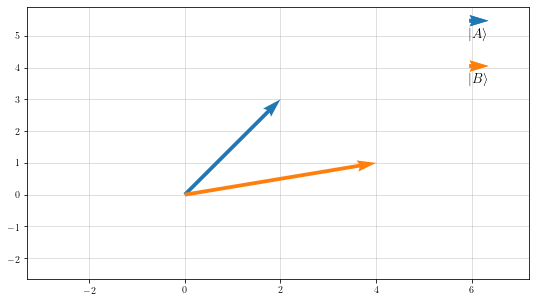

In [11]:
import numpy as np
from useful_fxns import plot_vec2d


# Define A and B:
A = np.array([2, 3])
B = np.array([4, 1])

vectors = [A, B]
labels = [r'${\left|{A}\right\rangle}$', r'${\left|{B}\right\rangle}$']

# Plot vectors
plot_vec2d(vectors, labels)

1. We first scale $\ket{A}$ into its unit vector $\hat{\left|{A}\right\rangle}$ by: $$\hat{\left|{A}\right\rangle} = \frac{\ket{A}}{\norm{\ket{A}}}$$

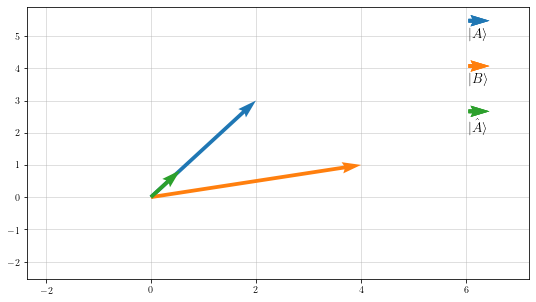

In [3]:
A_hat = A / np.linalg.norm(A)
vectors.append(A_hat)
labels.append(r'${\hat{\left|{A}\right\rangle}}$')

plot_vec2d(vectors, labels)

2. Next, subtract $\ket{B}$ from its projection along the $\hat{\left|{A}\right\rangle}$ direction. This leaves us with $\ket{C} = \ket{B} - \vectorproj[A]{\ket{B}}$, where <br/><br/> $$\vectorproj[A]{\ket{B}} = \frac{{\left\langle{B\;}\middle|{\;A}\right\rangle}}{\norm{\hat{\left|{A}\right\rangle}}^2}\: \hat{\left|{A}\right\rangle}$$

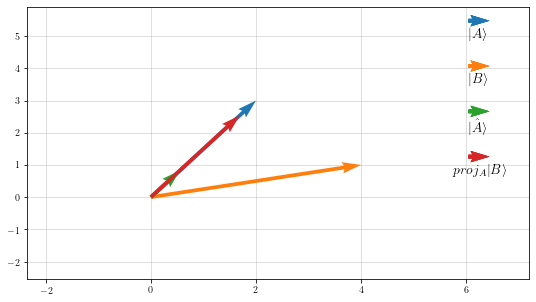

In [4]:
proj_B_A = (np.inner(B, A_hat) / (np.linalg.norm(A_hat) ** 2)) * A_hat  # Project B onto A
vectors.append(proj_B_A)
labels.append(r'$proj_{A}{{\left|{B}\right\rangle}}$')

plot_vec2d(vectors, labels)

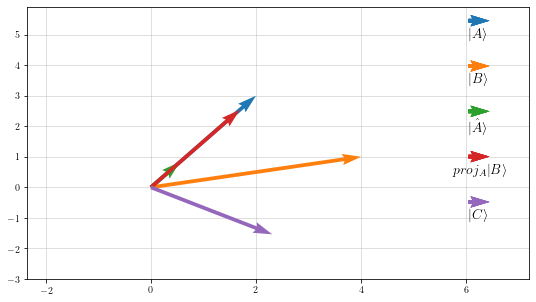

In [5]:
C = B - proj_B_A
vectors.append(C)
labels.append(r'${\left|{C}\right\rangle}$')

plot_vec2d(vectors, labels)

3. Now we can rescale $\ket{C}$ to $\ket{D}$ taking the norm as we did for $\hat{\left|{A}\right\rangle}$. $$\hat{\left|{D}\right\rangle} = \frac{\ket{C}}{\norm{\ket{C}}}$$

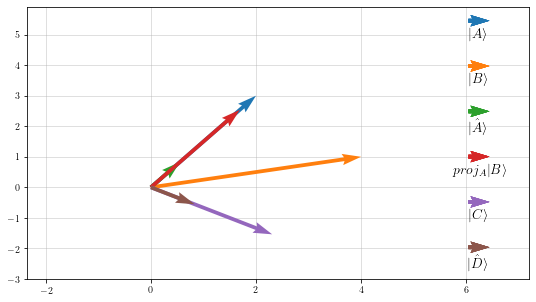

In [6]:
D_hat = C / np.linalg.norm(C)
vectors.append(D_hat)
labels.append(r'${\hat{\left|{D}\right\rangle}}$')

plot_vec2d(vectors, labels)

To clean up the plot, we can simply plot the origional two vectors and the final two orthonal vectors.

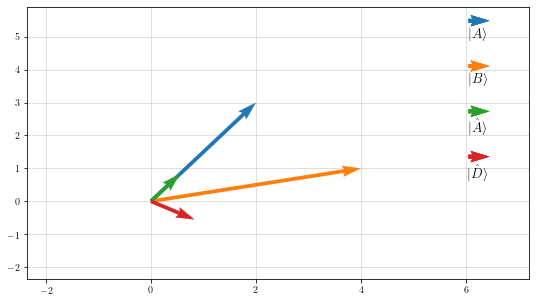

In [12]:
vectors = [A, B, A_hat, D_hat]
labels = [r'${\left|{A}\right\rangle}$', r'${\left|{B}\right\rangle}$', r'${\hat{\left|{A}\right\rangle}}$',r'${\hat{\left|{D}\right\rangle}}$']
plot_vec2d(vectors, labels)

Lastly, we can also check that $\hat{A}$ and $\hat{D} $ are indeed orthogonal by taking their inner product. If they are orthogonal then their inner product should equal ${0}$ by definition. Note: we may not get exactly $0$ due to computation or rounding errors but we will get some very small number close enough to zero.

In [13]:
np.inner(D_hat, A_hat)

-1.6653345369377348e-16